## import libraries and datasets

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import random 
from prophet import Prophet


sns.set()

In [2]:
avocado_df = pd.read_csv("avocado.csv")
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
avocado_df = avocado_df.sort_values("Date")
avocado_df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


## Exploration of data

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

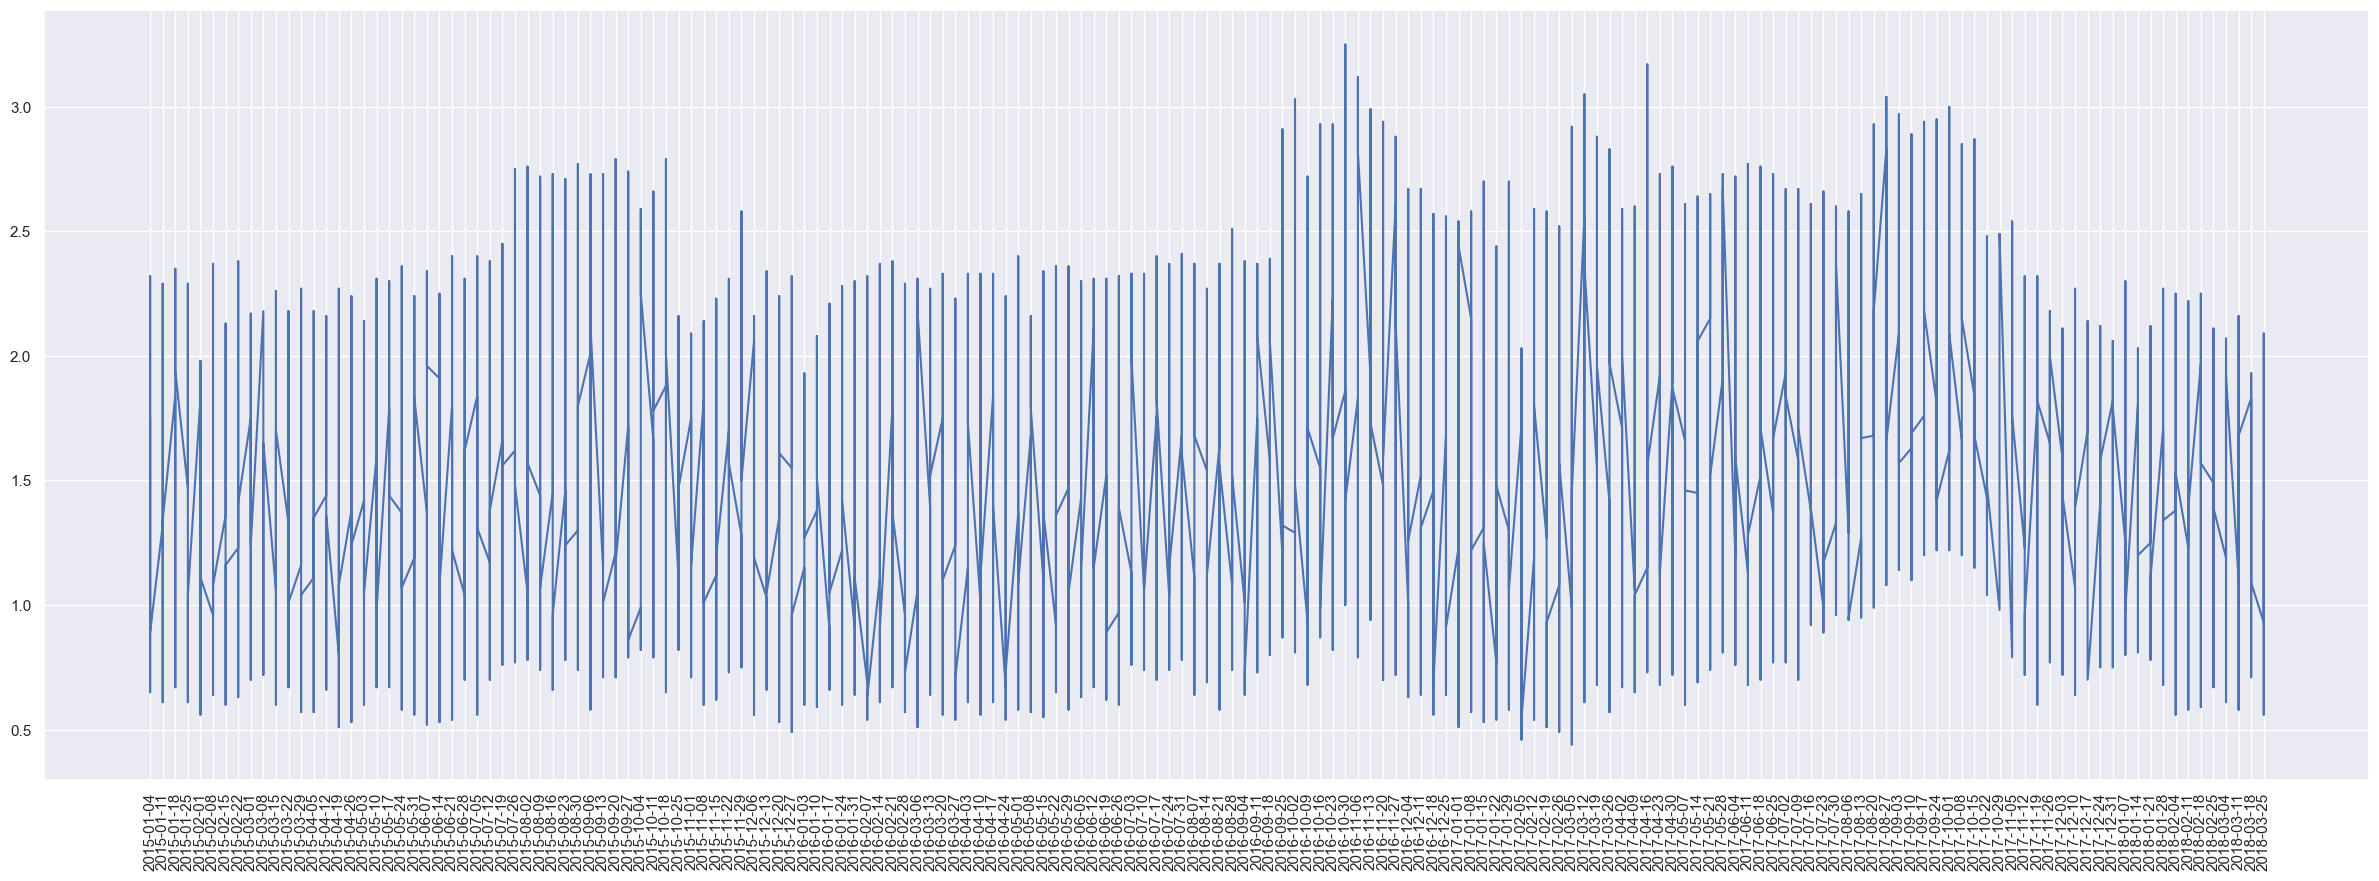

In [5]:
plt.figure(figsize=(30,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])
plt.xticks(rotation=90)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0,

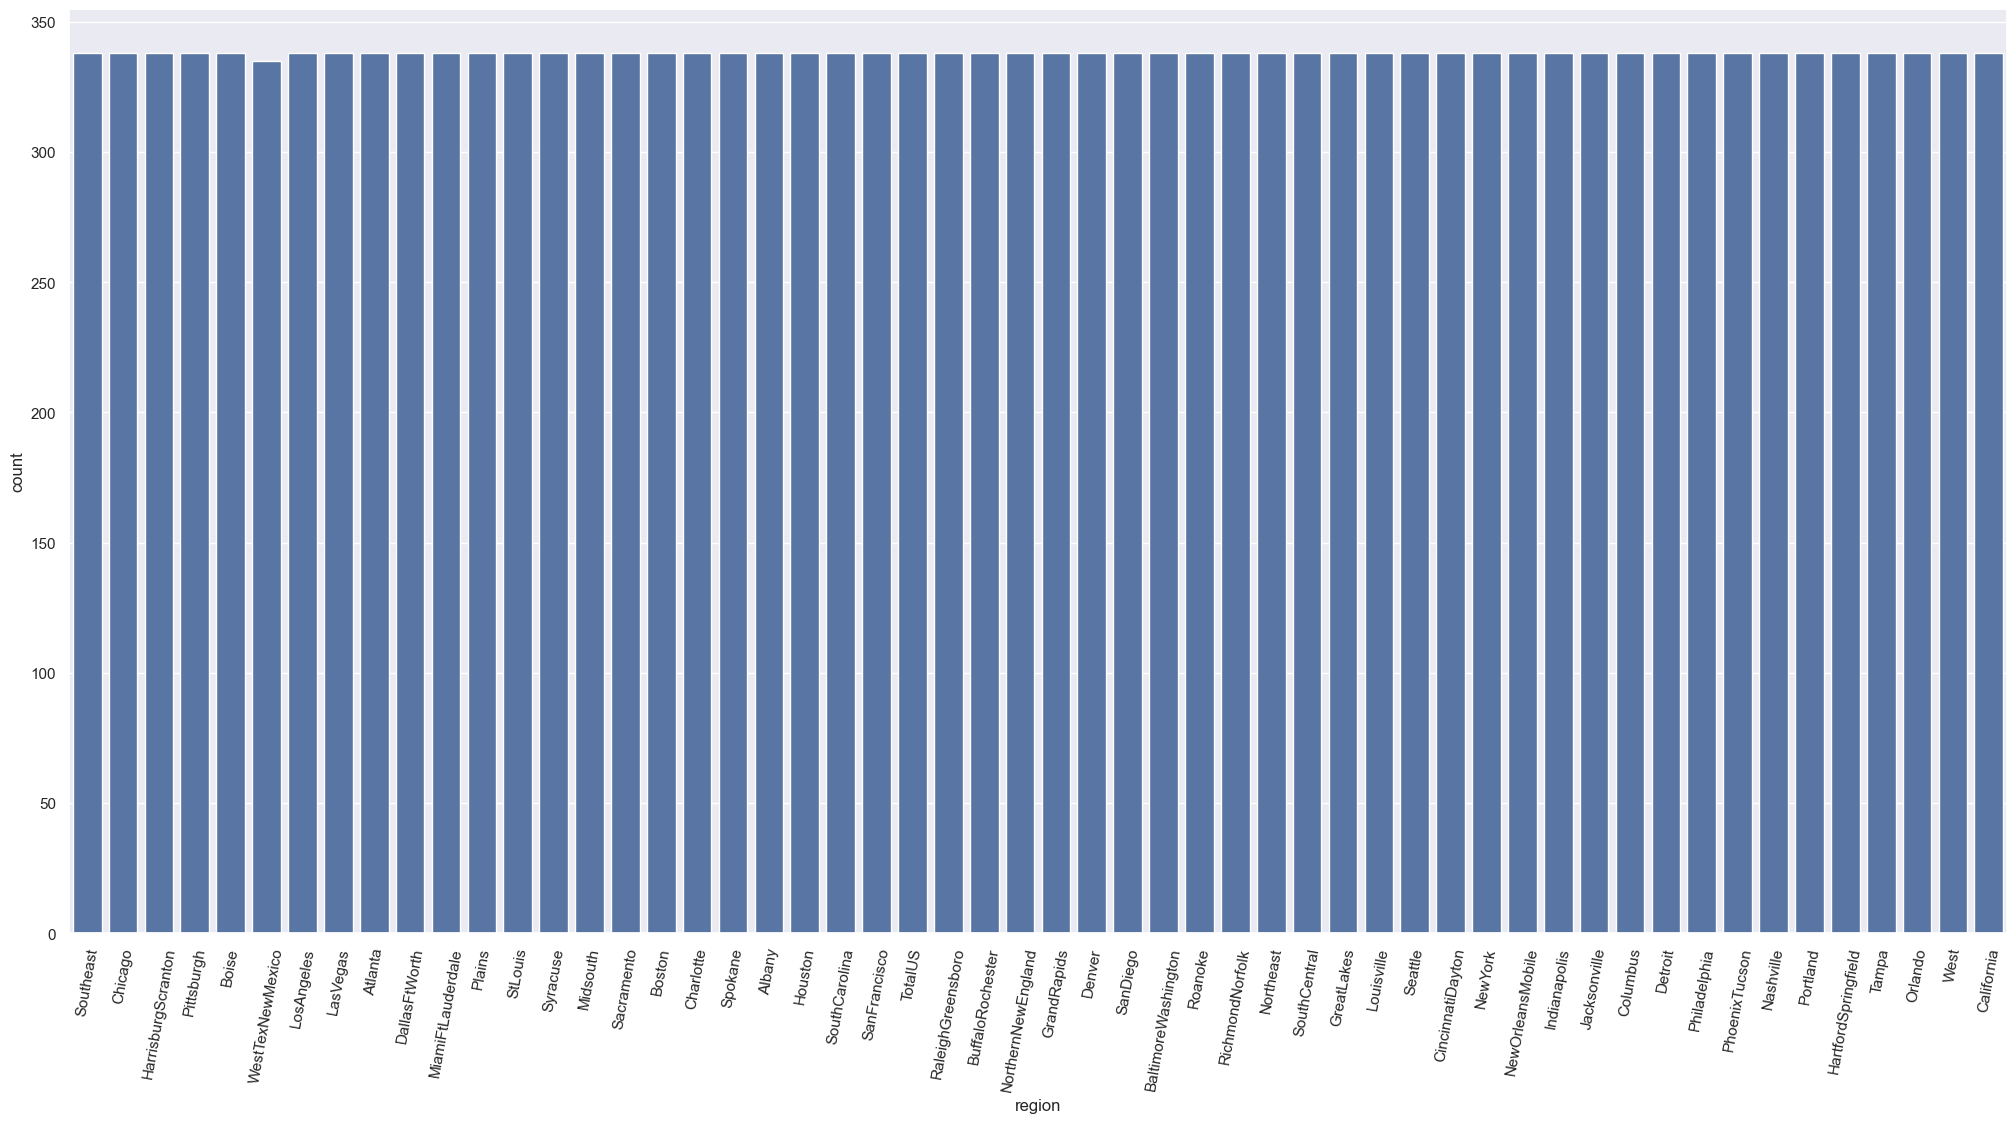

In [6]:
plt.figure(figsize=(25,12))
sns.countplot(x ='region',data = avocado_df)
plt.xticks(rotation=80)

<Axes: xlabel='year', ylabel='count'>

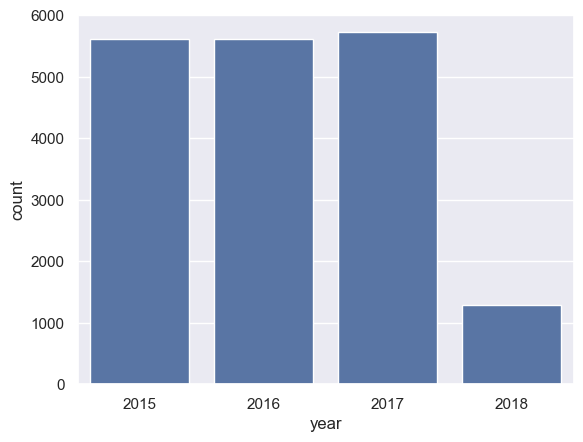

In [7]:
sns.countplot(x='year',data=avocado_df)

In [8]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [9]:
avocado_prophet_df = avocado_df[['Date','AveragePrice']]

In [10]:
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [11]:
avocado_prophet_df=avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [12]:


m = Prophet()

In [13]:
m.fit(avocado_prophet_df)

22:01:02 - cmdstanpy - INFO - Chain [1] start processing
22:01:04 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# forcast the future 
future =m.make_future_dataframe(periods= 1365)
forecast = m.predict(future)


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498913,0.888292,1.851928,1.498913,1.498913,-0.114502,-0.114502,-0.114502,-0.114502,-0.114502,-0.114502,0.0,0.0,0.0,1.384411
1,2015-01-11,1.493725,0.901779,1.847583,1.493725,1.493725,-0.106114,-0.106114,-0.106114,-0.106114,-0.106114,-0.106114,0.0,0.0,0.0,1.387611
2,2015-01-18,1.488536,0.903157,1.892091,1.488536,1.488536,-0.105835,-0.105835,-0.105835,-0.105835,-0.105835,-0.105835,0.0,0.0,0.0,1.382702
3,2015-01-25,1.483348,0.900961,1.814055,1.483348,1.483348,-0.124833,-0.124833,-0.124833,-0.124833,-0.124833,-0.124833,0.0,0.0,0.0,1.358515
4,2015-02-01,1.478160,0.837815,1.802104,1.478160,1.478160,-0.153222,-0.153222,-0.153222,-0.153222,-0.153222,-0.153222,0.0,0.0,0.0,1.324938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,2021-12-15,0.450815,-1.203478,1.894529,-1.041837,1.861076,-0.077940,-0.077940,-0.077940,-0.077940,-0.077940,-0.077940,0.0,0.0,0.0,0.372875
1530,2021-12-16,0.450097,-1.184250,1.832666,-1.043461,1.863538,-0.081542,-0.081542,-0.081542,-0.081542,-0.081542,-0.081542,0.0,0.0,0.0,0.368555
1531,2021-12-17,0.449379,-1.184447,1.879900,-1.045085,1.866000,-0.085092,-0.085092,-0.085092,-0.085092,-0.085092,-0.085092,0.0,0.0,0.0,0.364287
1532,2021-12-18,0.448662,-1.204797,1.918508,-1.046708,1.868112,-0.088575,-0.088575,-0.088575,-0.088575,-0.088575,-0.088575,0.0,0.0,0.0,0.360087


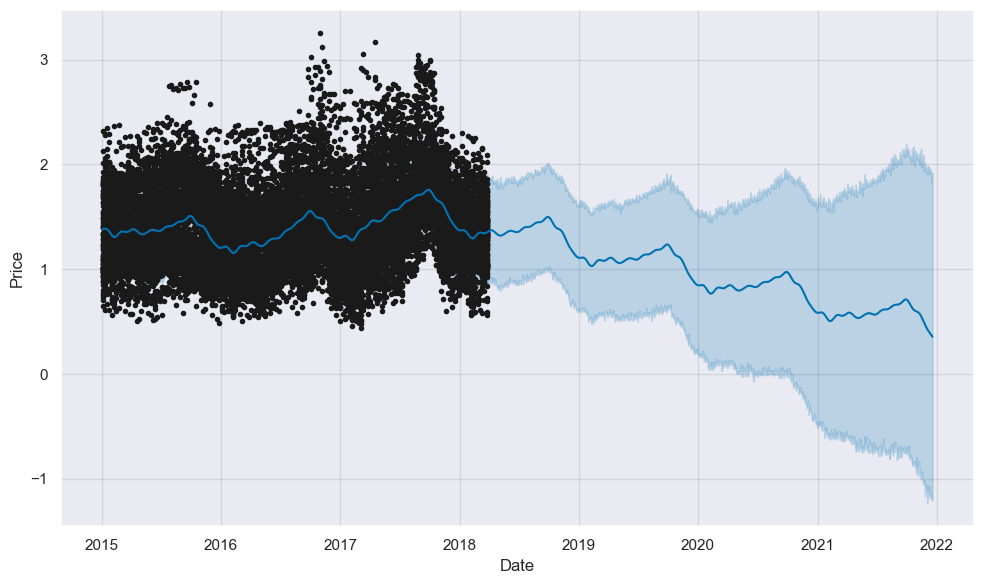

In [16]:
figure = m.plot(forecast,xlabel='Date',ylabel='Price')

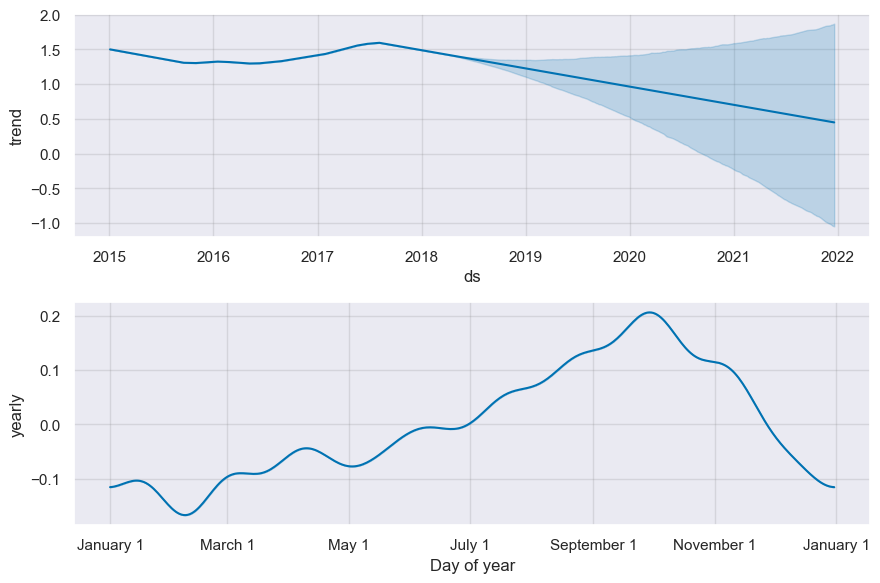

In [17]:
figure = m.plot_components(forecast)


# predicting for specific reason

In [18]:
avocado_df = pd.read_csv("avocado.csv")
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [20]:
avocado_df_sample = avocado_df[avocado_df['region']=='West']
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


In [22]:
avocado_df_sample = avocado_df_sample.sort_values('Date')
avocado_df_sample.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

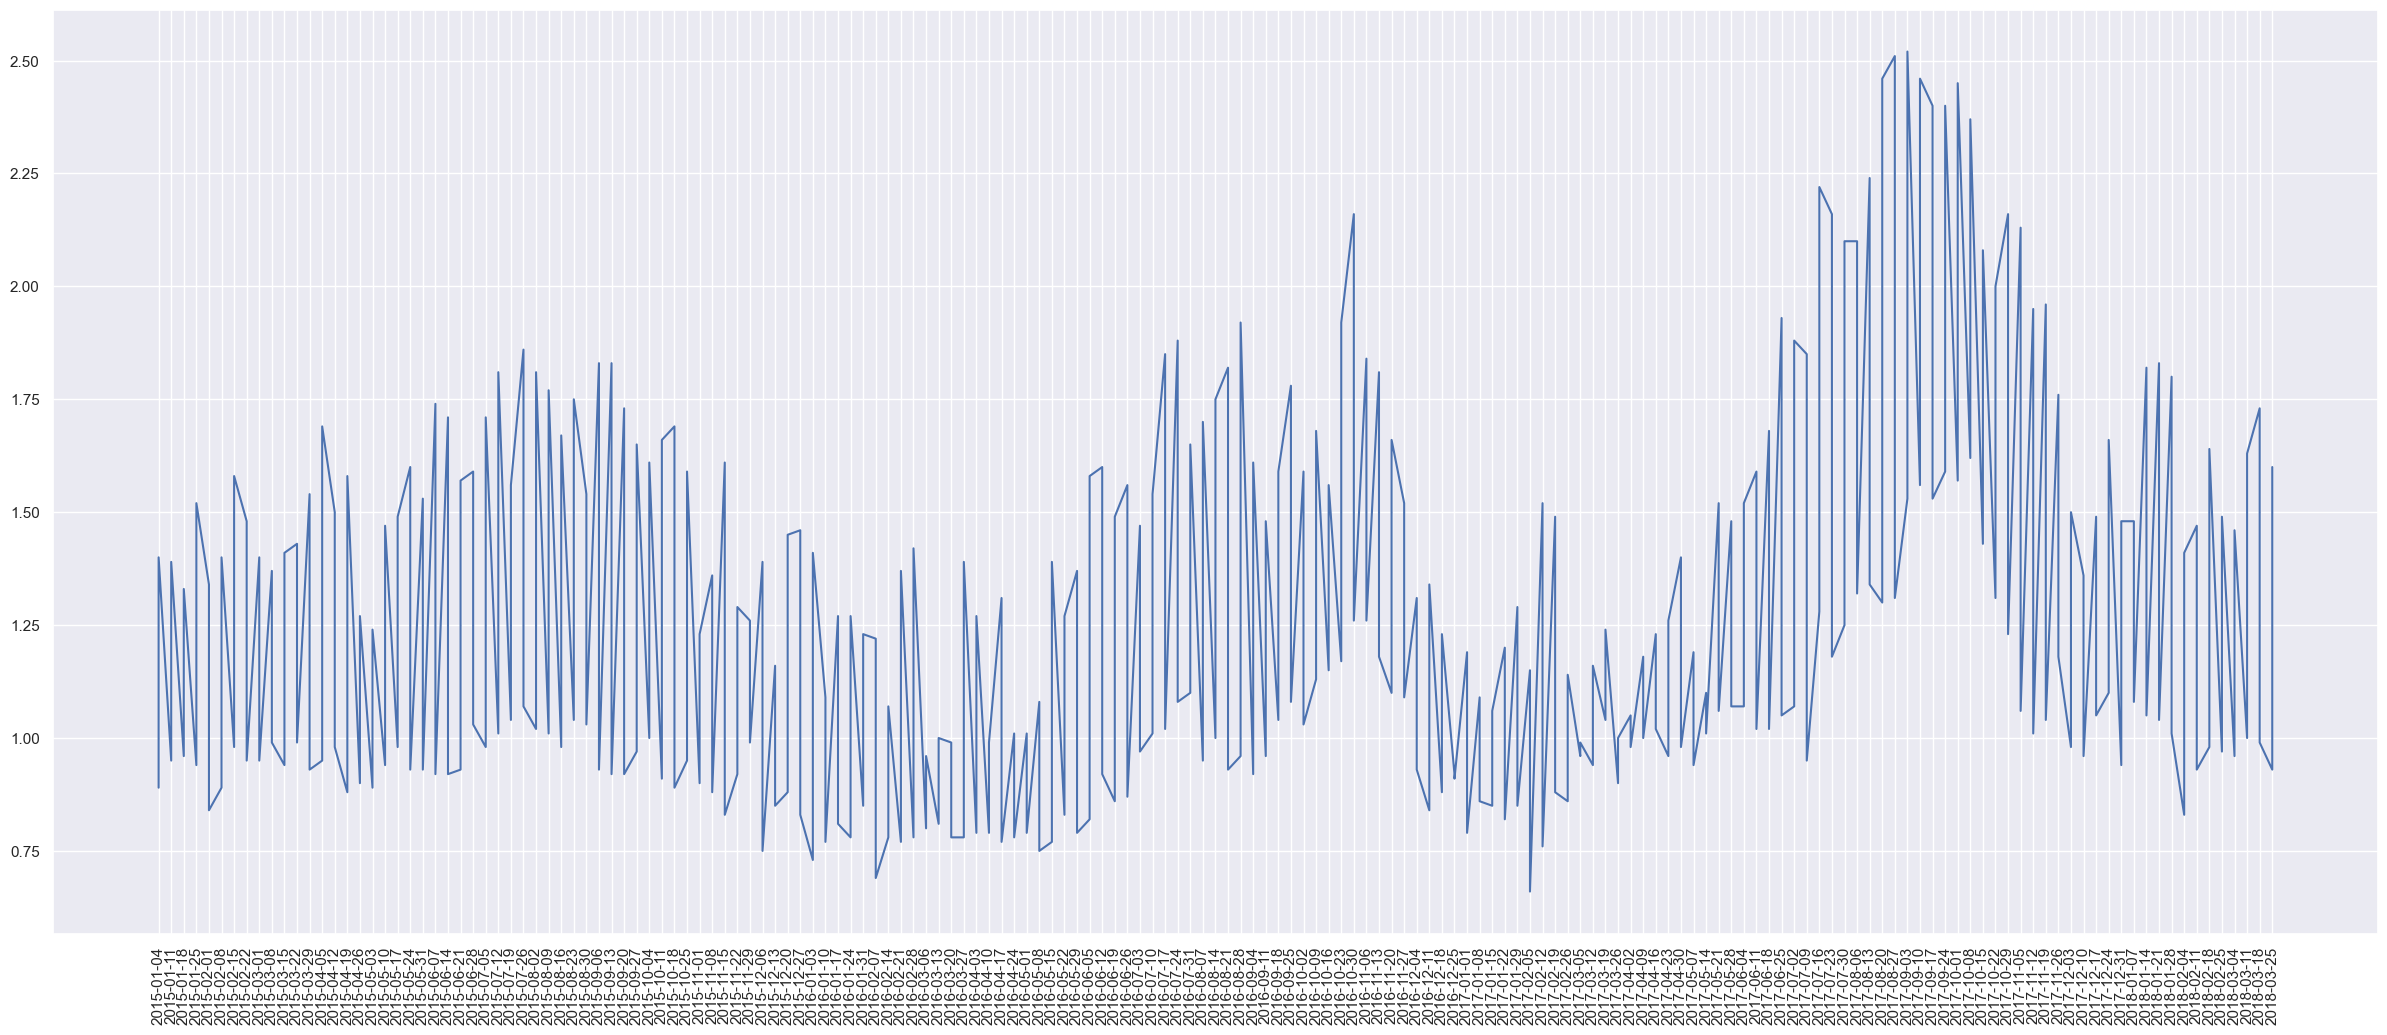

In [26]:
plt.figure(figsize=(30,12))
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])
plt.xticks(rotation = 90)

In [28]:
avocado_prophet_df_sample = avocado_df_sample[['Date','AveragePrice']]
avocado_prophet_df_sample

,Date,AveragePrice
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [29]:
avocado_prophet_df_sample = avocado_prophet_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})
avocado_prophet_df_sample

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96
...,...,...
18227,2018-03-11,1.63
18226,2018-03-18,1.73
9103,2018-03-18,0.99
9102,2018-03-25,0.93


In [30]:
from prophet import Prophet
m = Prophet()

In [31]:
m.fit(avocado_prophet_df_sample)

22:17:34 - cmdstanpy - INFO - Chain [1] start processing
22:17:34 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244822,0.641600,1.486055,1.244822,1.244822,-0.184884,-0.184884,-0.184884,-0.184884,-0.184884,-0.184884,0.0,0.0,0.0,1.059938
1,2015-01-11,1.243979,0.669208,1.500585,1.243979,1.243979,-0.165293,-0.165293,-0.165293,-0.165293,-0.165293,-0.165293,0.0,0.0,0.0,1.078686
2,2015-01-18,1.243136,0.660053,1.512207,1.243136,1.243136,-0.156106,-0.156106,-0.156106,-0.156106,-0.156106,-0.156106,0.0,0.0,0.0,1.087030
3,2015-01-25,1.242293,0.666113,1.489484,1.242293,1.242293,-0.168792,-0.168792,-0.168792,-0.168792,-0.168792,-0.168792,0.0,0.0,0.0,1.073501
4,2015-02-01,1.241450,0.622814,1.433082,1.241450,1.241450,-0.191183,-0.191183,-0.191183,-0.191183,-0.191183,-0.191183,0.0,0.0,0.0,1.050266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735869,1.107099,1.948303,1.707815,1.761344,-0.204382,-0.204382,-0.204382,-0.204382,-0.204382,-0.204382,0.0,0.0,0.0,1.531488
530,2019-03-22,1.736447,1.101813,1.948095,1.708287,1.762040,-0.199297,-0.199297,-0.199297,-0.199297,-0.199297,-0.199297,0.0,0.0,0.0,1.537150
531,2019-03-23,1.737026,1.118386,1.979358,1.708795,1.762773,-0.193647,-0.193647,-0.193647,-0.193647,-0.193647,-0.193647,0.0,0.0,0.0,1.543379
532,2019-03-24,1.737604,1.134352,1.923222,1.709286,1.763557,-0.187536,-0.187536,-0.187536,-0.187536,-0.187536,-0.187536,0.0,0.0,0.0,1.550068


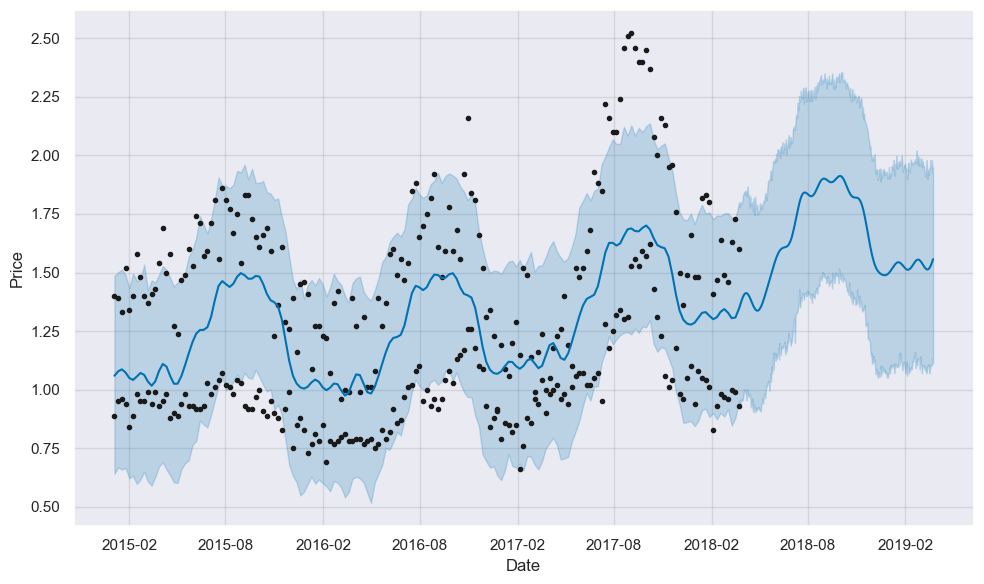

In [34]:
figure = m.plot(forecast,xlabel='Date',ylabel='Price')

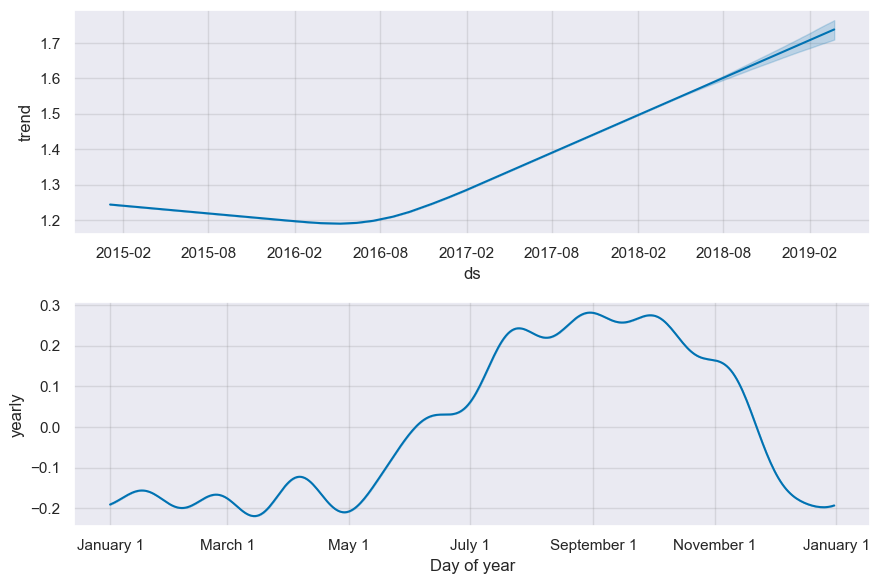

In [35]:
figure = m.plot_components(forecast)

In [36]:
import joblib
# Save the trained Prophet model to a file using joblib
joblib.dump(m, 'prophet_model.pkl')
print('Prophet model saved as "prophet_model.pkl"')

Prophet model saved as "prophet_model.pkl"
